In [1]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv("Filtered_connectivity_matrix_N188.csv")

In [3]:
df

,subject_id,roi1,roi2,fc,roi1_name,roi2_name,number_of_lifetime_suicide,scid_diagnosis,ace_score,age,gender,sex,ymrs_score,madrs_score
0,23517001,1,2,0.643225,LH_VisCent_ExStr_1,LH_VisCent_ExStr_2,30,BP1,NaN,29,Female,F,7,11
1,23517001,1,3,0.366445,LH_VisCent_ExStr_1,LH_VisCent_ExStr_3,30,BP1,NaN,29,Female,F,7,11
2,23517001,1,4,0.340565,LH_VisCent_ExStr_1,LH_VisCent_ExStr_4,30,BP1,NaN,29,Female,F,7,11
3,23517001,1,5,0.207231,LH_VisCent_ExStr_1,LH_VisCent_ExStr_5,30,BP1,NaN,29,Female,F,7,11
4,23517001,1,6,0.389274,LH_VisCent_ExStr_1,LH_VisCent_ExStr_6,30,BP1,NaN,29,Female,F,7,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19758884,23517589,459,461,0.462393,Subcortical_Anterior_29_putamen,Subcortical_Anterior_31_caudate,0,Control,2.0,42,Female,F,0,0
19758885,23517589,459,462,0.130539,Subcortical_Anterior_29_putamen,Subcortical_Posterior_32_caudate,0,Control,2.0,42,Female,F,0,0
19758886,23517589,460,461,0.068893,Subcortical_Posterior_30_putamen,Subcortical_Anterior_31_caudate,0,Control,2.0,42,Female,F,0,0
19758887,23517589,460,462,0.075282,Subcortical_Posterior_30_putamen,Subcortical_Posterior_32_caudate,0,Control,2.0,42,Female,F,0,0


# Preprocessing

In [4]:
df = pd.get_dummies(df, columns = ["scid_diagnosis"], drop_first = True, dtype=int)
df['bipolar'] = df.scid_diagnosis_Control.replace({0:1, 1:0})
df = df.drop('scid_diagnosis_Control', axis=1)

In [5]:
df

,subject_id,roi1,roi2,fc,roi1_name,roi2_name,number_of_lifetime_suicide,ace_score,age,gender,sex,ymrs_score,madrs_score,bipolar
0,23517001,1,2,0.643225,LH_VisCent_ExStr_1,LH_VisCent_ExStr_2,30,NaN,29,Female,F,7,11,1
1,23517001,1,3,0.366445,LH_VisCent_ExStr_1,LH_VisCent_ExStr_3,30,NaN,29,Female,F,7,11,1
2,23517001,1,4,0.340565,LH_VisCent_ExStr_1,LH_VisCent_ExStr_4,30,NaN,29,Female,F,7,11,1
3,23517001,1,5,0.207231,LH_VisCent_ExStr_1,LH_VisCent_ExStr_5,30,NaN,29,Female,F,7,11,1
4,23517001,1,6,0.389274,LH_VisCent_ExStr_1,LH_VisCent_ExStr_6,30,NaN,29,Female,F,7,11,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19758884,23517589,459,461,0.462393,Subcortical_Anterior_29_putamen,Subcortical_Anterior_31_caudate,0,2.0,42,Female,F,0,0,0
19758885,23517589,459,462,0.130539,Subcortical_Anterior_29_putamen,Subcortical_Posterior_32_caudate,0,2.0,42,Female,F,0,0,0
19758886,23517589,460,461,0.068893,Subcortical_Posterior_30_putamen,Subcortical_Anterior_31_caudate,0,2.0,42,Female,F,0,0,0
19758887,23517589,460,462,0.075282,Subcortical_Posterior_30_putamen,Subcortical_Posterior_32_caudate,0,2.0,42,Female,F,0,0,0


In [6]:
df2 = df.copy()
del df2["roi1"]
del df2["roi2"]
df2["connection"] = df2["roi1_name"] + "_to_" + df2["roi2_name"]
del df2["roi1_name"]
del df2["roi2_name"]
# del df_copy["gender"]
# del df_copy["bipolar"]
del df2["ymrs_score"]
del df2["madrs_score"]
del df2["number_of_lifetime_suicide"]
del df2["ace_score"]
# del df_copy["age"]
df2

,subject_id,fc,age,gender,sex,bipolar,connection
0,23517001,0.643225,29,Female,F,1,LH_VisCent_ExStr_1_to_LH_VisCent_ExStr_2
1,23517001,0.366445,29,Female,F,1,LH_VisCent_ExStr_1_to_LH_VisCent_ExStr_3
2,23517001,0.340565,29,Female,F,1,LH_VisCent_ExStr_1_to_LH_VisCent_ExStr_4
3,23517001,0.207231,29,Female,F,1,LH_VisCent_ExStr_1_to_LH_VisCent_ExStr_5
4,23517001,0.389274,29,Female,F,1,LH_VisCent_ExStr_1_to_LH_VisCent_ExStr_6
...,...,...,...,...,...,...,...
19758884,23517589,0.462393,42,Female,F,0,Subcortical_Anterior_29_putamen_to_Subcortical...
19758885,23517589,0.130539,42,Female,F,0,Subcortical_Anterior_29_putamen_to_Subcortical...
19758886,23517589,0.068893,42,Female,F,0,Subcortical_Posterior_30_putamen_to_Subcortica...
19758887,23517589,0.075282,42,Female,F,0,Subcortical_Posterior_30_putamen_to_Subcortica...


In [7]:
df3 = df2.pivot_table(index = ["subject_id", "age", "gender", "bipolar"],
                      columns = "connection", values = "fc", aggfunc = "mean")
df3 = df3.reset_index()
df3["subject_id"]
df3 = df3.dropna(axis = "columns")
df3

connection,subject_id,age,gender,bipolar,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_14_VIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_17_VIIIa,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_20_VIIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_23_IX,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_26_X,Cerebellum_Left_11_Crus-II_to_Cerebellum_Right_13_Crus-II,...,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Nucleus_9_accumbens,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_11_globus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_14_putamen,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_16_caudate,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_18_hippocampus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_27_globus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_30_putamen,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_32_caudate,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Ventroposterior_22_thalamus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Ventroposterior_24_thalamus
0,23517001,29,Female,1,0.195430,-0.180786,-0.163912,0.207013,-0.010768,0.380153,...,-0.056339,-0.066545,-0.174757,0.066877,0.058036,0.004740,-0.064307,0.166225,0.007851,0.568132
1,23517002,52,Female,1,-0.087752,-0.011919,-0.101318,0.590720,0.033193,0.530608,...,0.143818,0.089354,0.089399,0.153049,0.271751,0.176631,0.163850,0.218186,0.070755,0.580877
2,23517003,51,Female,1,0.321874,0.203355,0.311456,0.370826,0.401686,0.284200,...,0.096144,0.035590,0.112313,-0.064268,0.193890,0.071056,0.127272,-0.067681,0.320099,0.603557
3,23517004,57,Female,1,0.467059,0.398933,0.301866,0.580878,0.120079,0.262574,...,-0.173513,-0.002827,0.316429,0.211548,0.215207,-0.119092,0.456066,0.183130,0.381759,0.625480
4,23517005,41,Female,1,0.163375,-0.124015,-0.169056,0.435984,0.151963,0.640072,...,-0.083881,-0.031415,-0.090913,-0.115555,0.209509,-0.059619,0.111331,-0.133788,0.240842,0.484379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,23517585,61,Female,0,-0.192281,0.191404,0.262254,0.191064,0.218456,0.428034,...,-0.141143,0.073140,0.306860,0.215465,0.274172,-0.157383,0.297836,0.300150,0.257680,0.682978
184,23517586,62,Female,0,0.002544,-0.479788,-0.358171,0.210885,0.120859,0.196226,...,-0.107086,-0.212532,0.009093,0.373455,0.194186,-0.212464,0.070252,0.238361,0.149723,0.675494
185,23517587,37,Female,0,-0.176252,-0.231080,-0.141725,0.657327,0.218787,0.780813,...,-0.147917,-0.060315,0.139082,0.225519,0.418525,0.016184,0.029759,0.165217,0.248647,0.428744
186,23517588,58,Female,0,0.499517,0.233844,0.096886,0.045345,0.202528,0.524760,...,0.060815,0.203437,0.205441,0.108297,0.030602,0.379305,0.117189,0.275819,0.558135,0.853572


In [8]:
df3 = pd.get_dummies(df3, columns = ["gender"], drop_first = True, dtype=int)

In [9]:
df3['female'] = df3.gender_Male.replace({0:1, 1:0})
for i in range(0, len(df3)):
    if df3.loc[i, 'gender_Other']==1 or df3.loc[i, 'gender_T']==1:
        df3.loc[i, 'female'] = 0
df3 = df3.drop(['gender_Male','gender_Other','gender_T'], axis=1)

In [10]:
cols = df3.columns.tolist()
cols = cols[0:2] + cols[-1:] + cols[2:-1]
df3 = df3[cols]
df3 = df3.rename(columns={'subject_id':'subject_key'})

In [11]:
df3

,subject_key,age,female,bipolar,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_14_VIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_17_VIIIa,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_20_VIIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_23_IX,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_26_X,Cerebellum_Left_11_Crus-II_to_Cerebellum_Right_13_Crus-II,...,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Nucleus_9_accumbens,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_11_globus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_14_putamen,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_16_caudate,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_18_hippocampus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_27_globus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_30_putamen,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_32_caudate,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Ventroposterior_22_thalamus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Ventroposterior_24_thalamus
0,23517001,29,1,1,0.195430,-0.180786,-0.163912,0.207013,-0.010768,0.380153,...,-0.056339,-0.066545,-0.174757,0.066877,0.058036,0.004740,-0.064307,0.166225,0.007851,0.568132
1,23517002,52,1,1,-0.087752,-0.011919,-0.101318,0.590720,0.033193,0.530608,...,0.143818,0.089354,0.089399,0.153049,0.271751,0.176631,0.163850,0.218186,0.070755,0.580877
2,23517003,51,1,1,0.321874,0.203355,0.311456,0.370826,0.401686,0.284200,...,0.096144,0.035590,0.112313,-0.064268,0.193890,0.071056,0.127272,-0.067681,0.320099,0.603557
3,23517004,57,1,1,0.467059,0.398933,0.301866,0.580878,0.120079,0.262574,...,-0.173513,-0.002827,0.316429,0.211548,0.215207,-0.119092,0.456066,0.183130,0.381759,0.625480
4,23517005,41,1,1,0.163375,-0.124015,-0.169056,0.435984,0.151963,0.640072,...,-0.083881,-0.031415,-0.090913,-0.115555,0.209509,-0.059619,0.111331,-0.133788,0.240842,0.484379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
183,23517585,61,1,0,-0.192281,0.191404,0.262254,0.191064,0.218456,0.428034,...,-0.141143,0.073140,0.306860,0.215465,0.274172,-0.157383,0.297836,0.300150,0.257680,0.682978
184,23517586,62,1,0,0.002544,-0.479788,-0.358171,0.210885,0.120859,0.196226,...,-0.107086,-0.212532,0.009093,0.373455,0.194186,-0.212464,0.070252,0.238361,0.149723,0.675494
185,23517587,37,1,0,-0.176252,-0.231080,-0.141725,0.657327,0.218787,0.780813,...,-0.147917,-0.060315,0.139082,0.225519,0.418525,0.016184,0.029759,0.165217,0.248647,0.428744
186,23517588,58,1,0,0.499517,0.233844,0.096886,0.045345,0.202528,0.524760,...,0.060815,0.203437,0.205441,0.108297,0.030602,0.379305,0.117189,0.275819,0.558135,0.853572


In [12]:
# df3.subject_id.rename('subject_key').to_csv('con_subjects.csv', index=False)

In [13]:
# Use only subjects with all 3 modalities
subjects_list = pd.read_csv('3_modalities_subjects.csv')
df3 = df3.merge(subjects_list, how='inner', on='subject_key')
df3.shape

(186, 98794)

**Split data into train and test.**

In [17]:
# Use the same test cases as I did in the volumetric analysis.
test_subject_ids = [23517046, 23517029, 23517034, 23517519, 23517107, 23517121,
       23517145, 23517092, 23517011, 23517026, 23517515, 23517550,
       23517585, 23517081, 23517014, 23517579, 23517507, 23517105,
       23517564, 23517009, 23517147, 23517077, 23517083, 23517546,
       23517533, 23517577, 23517541, 23517089, 23517509, 23517133,
       23517547, 23517588, 23517567, 23517125, 23517587, 23517119,
       23517086, 23517088, 23517099, 23517571, 23517124, 23517058,
       23517015] # These are the test subject ids in the volumetric analysis.

In [18]:
df4 = df3.copy()
df4['test'] = 0
for i in range(len(df4)):
    if df4.subject_key[i] in test_subject_ids:
        df4.loc[i, 'test'] = 1
# Final test subject ids:
final_test_subjects = df4.loc[df4.test==1, 'subject_key']
final_test_subjects

8      23517009
9      23517011
11     23517014
12     23517015
22     23517026
24     23517029
27     23517034
36     23517046
48     23517058
62     23517081
64     23517086
66     23517088
68     23517092
73     23517099
78     23517105
80     23517107
90     23517119
93     23517124
94     23517125
104    23517145
106    23517147
114    23517507
116    23517509
121    23517515
124    23517519
136    23517533
141    23517541
146    23517546
147    23517547
150    23517550
163    23517564
165    23517567
169    23517571
175    23517577
177    23517579
181    23517585
183    23517587
184    23517588
Name: subject_key, dtype: int64

In [20]:
# Split the data into training and test sets
df_train = df4.loc[df4.test==0, :]
df_test = df4.loc[df4.test==1, :]
X_train = df_train.drop(['bipolar', 'subject_key', 'test'], axis=1)
X_test = df_test.drop(['bipolar', 'subject_key', 'test'], axis=1)
y_train = df_train['bipolar']
y_test = df_test['bipolar']

X_train.shape, X_test.shape, len(y_train), len(y_test)

((148, 98792), (38, 98792), 148, 38)

In [ ]:
# Split training data into training and validation sets
from sklearn.model_selection import train_test_split
X_train2, X_val, y_train2, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

y_train.mean(), y_train2.mean(), y_val.mean(), y_test.mean() #proportion of bipolar in training, validation, and test sets

In [21]:
X_train

,age,female,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_14_VIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_17_VIIIa,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_20_VIIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_23_IX,Cerebellum_Left_11_Crus-II_to_Cerebellum_Left_26_X,Cerebellum_Left_11_Crus-II_to_Cerebellum_Right_13_Crus-II,Cerebellum_Left_11_Crus-II_to_Cerebellum_Right_16_VIIb,Cerebellum_Left_11_Crus-II_to_Cerebellum_Right_19_VIIIa,...,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Nucleus_9_accumbens,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_11_globus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_14_putamen,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_16_caudate,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_18_hippocampus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_27_globus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_30_putamen,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Posterior_32_caudate,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Ventroposterior_22_thalamus,Subcortical_Ventroposterior_8_thalamus_to_Subcortical_Ventroposterior_24_thalamus
0,29,1,0.195430,-0.180786,-0.163912,0.207013,-0.010768,0.380153,0.220507,-0.263821,...,-0.056339,-0.066545,-0.174757,0.066877,0.058036,0.004740,-0.064307,0.166225,0.007851,0.568132
1,52,1,-0.087752,-0.011919,-0.101318,0.590720,0.033193,0.530608,-0.036177,-0.181819,...,0.143818,0.089354,0.089399,0.153049,0.271751,0.176631,0.163850,0.218186,0.070755,0.580877
2,51,1,0.321874,0.203355,0.311456,0.370826,0.401686,0.284200,0.400721,0.271354,...,0.096144,0.035590,0.112313,-0.064268,0.193890,0.071056,0.127272,-0.067681,0.320099,0.603557
3,57,1,0.467059,0.398933,0.301866,0.580878,0.120079,0.262574,-0.003835,0.004480,...,-0.173513,-0.002827,0.316429,0.211548,0.215207,-0.119092,0.456066,0.183130,0.381759,0.625480
4,41,1,0.163375,-0.124015,-0.169056,0.435984,0.151963,0.640072,0.165493,-0.201264,...,-0.083881,-0.031415,-0.090913,-0.115555,0.209509,-0.059619,0.111331,-0.133788,0.240842,0.484379
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
178,52,0,-0.005755,-0.237863,0.122053,0.420615,0.374369,0.403251,0.034821,-0.228025,...,0.003220,0.239935,-0.111328,-0.013577,0.117485,0.126148,0.006581,0.094099,0.230464,0.531968
179,41,1,0.391604,0.235946,0.239635,0.314405,0.015212,0.489241,0.164643,0.347447,...,-0.222144,-0.007164,0.085106,0.163633,0.051395,0.058236,0.128384,0.110470,0.043491,0.676385
180,60,1,0.591575,0.140251,0.306772,0.651514,0.250528,0.727273,0.514638,0.277730,...,-0.153710,-0.143630,-0.084454,0.302954,0.172320,0.253840,-0.137744,0.197704,0.386105,0.661287
182,62,1,0.002544,-0.479788,-0.358171,0.210885,0.120859,0.196226,-0.010490,-0.290806,...,-0.107086,-0.212532,0.009093,0.373455,0.194186,-0.212464,0.070252,0.238361,0.149723,0.675494


In [22]:
# Normalize the training, initial training, validation, and test sets:
from sklearn.preprocessing import MinMaxScaler
X_train = np.array(X_train)
X_test = np.array(X_test)
X_train2 = np.array(X_train2)
X_val = np.array(X_val)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train.reshape(-1, X_train.shape[-1])).reshape(X_train.shape)
X_test = scaler.transform(X_test.reshape(-1, X_test.shape[-1])).reshape(X_test.shape)
X_train2 = scaler.transform(X_train2.reshape(-1, X_train2.shape[-1])).reshape(X_train2.shape)
X_val = scaler.transform(X_val.reshape(-1, X_val.shape[-1])).reshape(X_val.shape)

X_train2.shape, X_val.shape, X_test.shape, len(y_train), len(y_val), len(y_test)

In [23]:
y_train.mean(), y_test.mean()

(0.5878378378378378, 0.5526315789473685)

In [113]:
y_train = y_train.reset_index().bipolar
df_train = df_train.reset_index()
from sklearn.model_selection import KFold
kf = KFold(n_splits=10, shuffle=True, random_state=6)
kf.split(X_train, y=y_train)
X_cv_train = {}
X_cv_test = {}
y_cv_train = {}
y_cv_test = {}
test_subjects = {}
test_indices = {}
for i, (train_index, test_index) in enumerate(kf.split(X_train, y=y_train)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")
    X_cv_train[i] = X_train[train_index, :]
    y_cv_train[i] = y_train[train_index]
    X_cv_test[i] = X_train[test_index, :]
    y_cv_test[i] = y_train[test_index]
    test_subjects[i] = df_train.subject_key[test_index].values
    test_indices[i] = test_index

Fold 0:
  Train: index=[  0   1   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  24  25  26  27  28  29  30  31  32  33  34  35  36  37
  38  40  41  42  43  44  45  46  47  48  49  50  51  52  55  56  57  58
  59  60  62  63  64  65  66  67  68  69  70  71  75  76  77  78  79  80
  81  82  83  84  85  86  87  88  89  90  91  92  93  94  96  97  98  99
 100 101 102 103 104 105 106 107 109 110 111 112 113 114 115 116 117 118
 119 121 123 124 125 126 127 128 129 130 131 132 134 135 136 137 138 139
 140 141 142 143 144 146 147]
  Test:  index=[  2  23  39  53  54  61  72  73  74  95 108 120 122 133 145]
Fold 1:
  Train: index=[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  17  18  19
  20  21  22  23  24  25  26  27  28  29  31  33  34  35  36  38  39  40
  41  42  43  44  45  46  47  48  49  50  51  53  54  56  57  59  61  62
  63  64  65  66  67  68  69  70  71  72  73  74  75  76  77  78  79  80
  81  82  84  85  86  87  88  90  91  92  93

In [24]:
X_train.shape, X_test.shape, len(y_train), len(y_test)

((148, 98792), (38, 98792), 148, 38)

# Logistic Regression

In [22]:
# Logistic regression
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='liblinear', penalty='l1', fit_intercept=True, intercept_scaling=1,# l1_ratio=1.0,
                       max_iter=2000, C=0.75, class_weight={0:1,1:1}, tol=1e-4, random_state=47).fit(X_train, y_train)
lr.score(X_test, y_test)

0.8157894736842105

### Cross-validation on training set

In [416]:
cv_acc = np.ones(10)
con_output_master = pd.DataFrame()
for i in range(0, 10):
    lr = LogisticRegression(solver='liblinear', penalty='l1', fit_intercept=True, intercept_scaling=1,# l1_ratio=1.0,
                       max_iter=2000, C=0.75, class_weight={0:1,1:1}, tol=1e-4, random_state=47).fit(X_cv_train[i], y_cv_train[i])   
    cv_acc[i] = lr.score(X_cv_test[i], y_cv_test[i])
    # Save output on test set
    con_output = pd.DataFrame(lr.predict_proba(X_cv_test[i]))
    con_output.index = test_subjects[i]
    con_output = con_output.rename(columns={0:'con_lr_0', 1:'con_lr_1'})
    #con_output.to_csv('con_lr_cv'+str(i)+'.csv')
    con_output_master = pd.concat([con_output_master, con_output])

In [417]:
cv_acc, cv_acc.mean()

(array([0.73333333, 0.73333333, 0.73333333, 0.73333333, 0.33333333,
        0.6       , 0.73333333, 0.73333333, 0.64285714, 0.71428571]),
 0.6690476190476191)

In [210]:
con_output_master.to_csv('con_lr_cv.csv')

### Shap

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


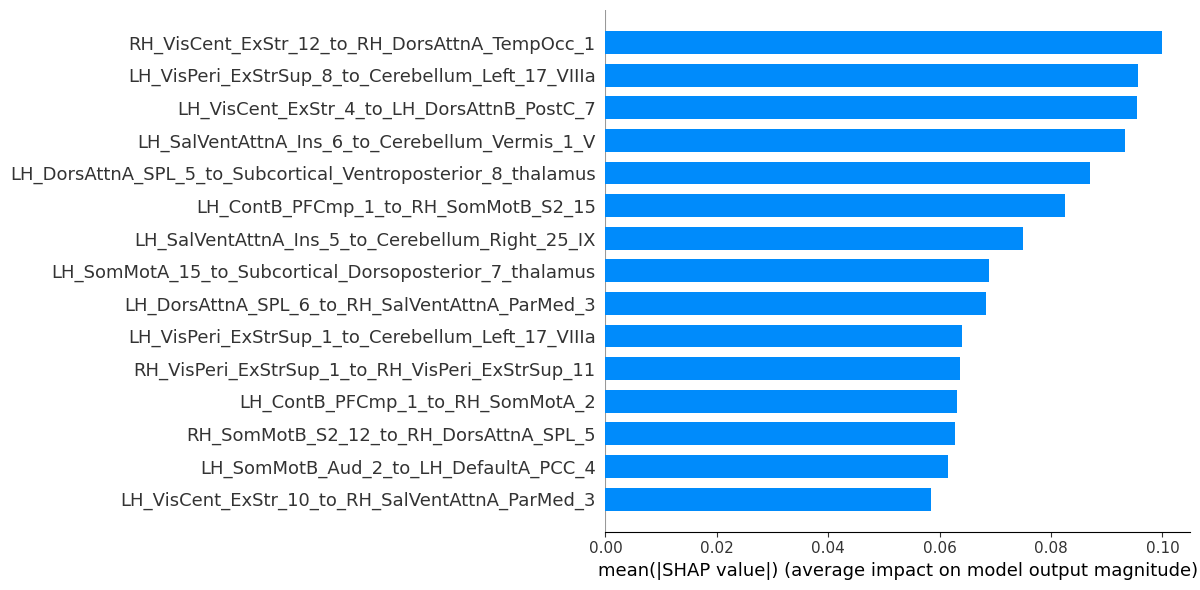

In [23]:
import shap
from shap import LinearExplainer

# select background for shap
explainer1 = LinearExplainer(lr, X_train)
shap_values_train = explainer1.shap_values(X_train)  
shap_values_test = explainer1.shap_values(X_test)
shap.summary_plot(shap_values_test, plot_type = 'bar',
                  feature_names=df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns,
                  plot_size=[12.1,6], max_display=15, show=False)
# plt.savefig('shap_con.png')

In [26]:
df_train.drop(['bipolar', 'subject_key', 'test', 'index'], axis=1).columns[
    np.argsort(np.abs(shap_values_test).mean(0))][-15::][::-1]

Index(['RH_VisCent_ExStr_12_to_RH_DorsAttnA_TempOcc_1',
       'LH_VisPeri_ExStrSup_8_to_Cerebellum_Left_17_VIIIa',
       'LH_VisCent_ExStr_4_to_LH_DorsAttnB_PostC_7',
       'LH_SalVentAttnA_Ins_6_to_Cerebellum_Vermis_1_V',
       'LH_DorsAttnA_SPL_5_to_Subcortical_Ventroposterior_8_thalamus',
       'LH_ContB_PFCmp_1_to_RH_SomMotB_S2_15',
       'LH_SalVentAttnA_Ins_5_to_Cerebellum_Right_25_IX',
       'LH_SomMotA_15_to_Subcortical_Dorsoposterior_7_thalamus',
       'LH_DorsAttnA_SPL_6_to_RH_SalVentAttnA_ParMed_3',
       'LH_VisPeri_ExStrSup_1_to_Cerebellum_Left_17_VIIIa',
       'RH_VisPeri_ExStrSup_1_to_RH_VisPeri_ExStrSup_11',
       'LH_ContB_PFCmp_1_to_RH_SomMotA_2',
       'RH_SomMotB_S2_12_to_RH_DorsAttnA_SPL_5',
       'LH_SomMotB_Aud_2_to_LH_DefaultA_PCC_4',
       'LH_VisCent_ExStr_10_to_RH_SalVentAttnA_ParMed_3'],
      dtype='object')

In [48]:
indices = np.argsort(np.abs(shap_values_test).mean(0))[-10::][::-1]
np.sort(np.abs(shap_values_test).mean(0))[-10::][::-1]

array([0.09994939, 0.09558967, 0.09547663, 0.09330641, 0.08692803,
       0.08248292, 0.07500582, 0.06891784, 0.0683949 , 0.06395542])

In [28]:
df5 = df4[df_train.drop(['bipolar', 'subject_key', 'test'], axis=1).columns[indices]].copy()
df5['subject_key'] = df4.subject_key
df5.to_csv('con_important.csv')

### Try models with only the 10 most important predictors

In [44]:
df5 = df4[df_train.drop(['bipolar', 'subject_key', 'test'], axis=1).columns[indices]].copy()
X_train_small = df_train[df_train.drop(['bipolar', 'subject_key', 'test'], axis=1).columns[indices]].copy()
X_test_small = df_test[df_train.drop(['bipolar', 'subject_key', 'test'], axis=1).columns[indices]].copy()
y_train = df_train['bipolar']
y_test = df_test['bipolar']

X_train_small.shape, X_test_small.shape, len(y_train), len(y_test)

((148, 10), (38, 10), 148, 38)

In [ ]:
# Normalize X_train and X_test:
from sklearn.preprocessing import MinMaxScaler
X_train_small = np.array(X_train_small)
X_test_small = np.array(X_test_small)
scaler = MinMaxScaler()
X_train_small = scaler.fit_transform(X_train_small.reshape(-1, X_train_small.shape[-1])).reshape(X_train_small.shape)
X_test_small = scaler.transform(X_test_small.reshape(-1, X_test_small.shape[-1])).reshape(X_test_small.shape)

In [33]:
lr = LogisticRegression(solver='liblinear', penalty='l1', fit_intercept=True, intercept_scaling=1,# l1_ratio=1.0,
                       max_iter=2000, C=0.75, class_weight={0:1,1:1}, tol=1e-4, random_state=47).fit(X_train_small, y_train)
lr.score(X_test_small, y_test)

0.7105263157894737

### Visualize the important predictors in the logistic regression

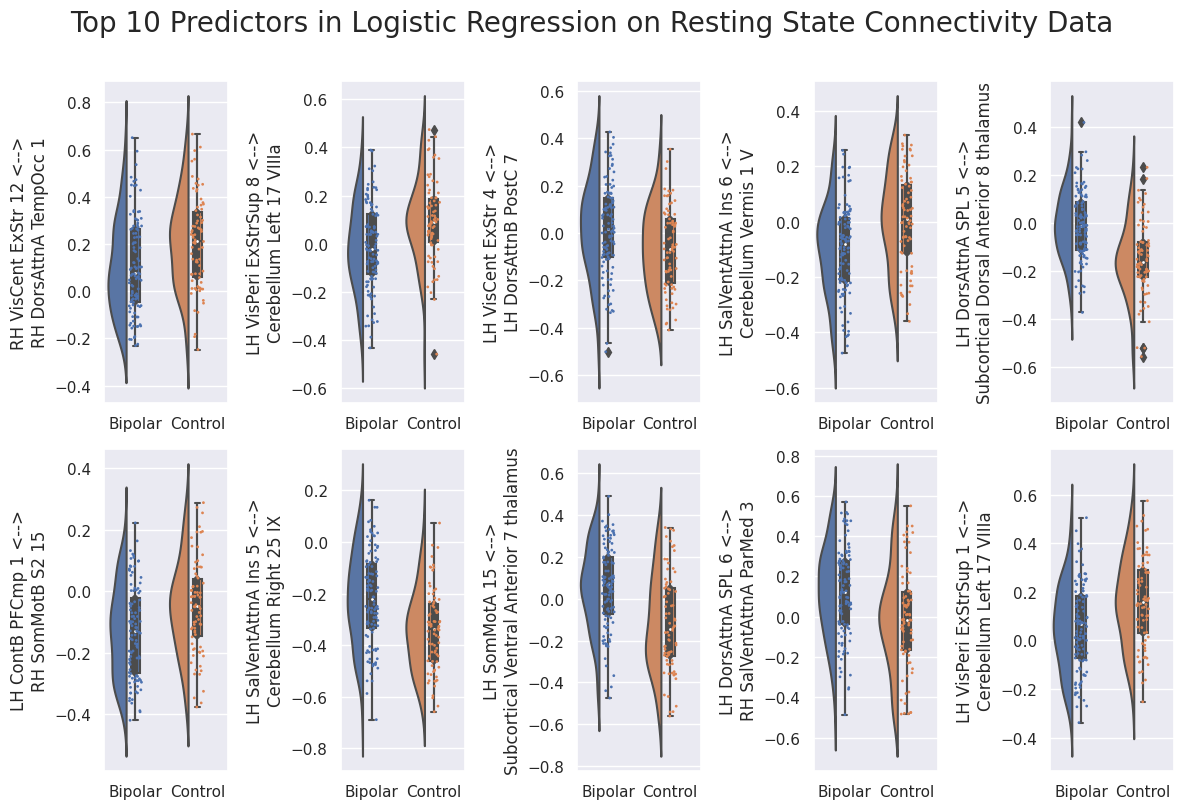

In [51]:
import math
import ptitprince as pt
import seaborn as sns

X = df4.drop(['bipolar', 'subject_key', 'test'], axis=1)
y = df4.bipolar
y3 = y.replace({0: 'Control', 1: 'Bipolar'})
y3.name = ''

names = list(X.columns)
i = 0
for name in names:
    name = name.replace('_to_', '_to\n', 1)
    name = name.replace('_', ' ')
    name = name.replace('to', '<-->')
    name = name.replace('Ventroposterior', 'Dorsal Anterior')
    name = name.replace('Dorsoposterior', 'Ventral Anterior')
    names[i] = name
    i += 1
X.columns = names

sns.set(style="darkgrid", font_scale=1)
fig, axes = plt.subplots(2, 5, sharey=False, figsize=(12,8))
j = 0
k = 0
for i in range(0, 10):
    j = math.floor(i/5)
    k = i - math.floor(i/5) * 5
    pt.half_violinplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], width=.6)
    sns.stripplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], s=2)
    sns.boxplot(x=y3, y=X.columns[indices[i]], data=X.iloc[:,indices], ax=axes[j, k], width = .15)
    
fig.suptitle('Top 10 Predictors in Logistic Regression on Resting State Connectivity Data', fontsize=20, y=1.01)
fig.tight_layout()
plt.show()

### Metrics

In [426]:
predicted = lr.predict(X_test)
actual = np.array(y_test)
predicted, actual

(array([1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [427]:
results = np.empty(len(predicted)).tolist()
for i in range(0, len(predicted)):
    if predicted[i]==1 and actual[i]==1:
        results[i] = 'tp'
    if predicted[i]==0 and actual[i]==1:
        results[i] = 'fn'
    if predicted[i]==1 and actual[i]==0:
        results[i] = 'fp'
    if predicted[i]==0 and actual[i]==0:
        results[i] = 'tn'
np.array(results)

array(['tp', 'tp', 'tp', 'fn', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp',
       'tp', 'fn', 'tp', 'tp', 'tp', 'tp', 'tp', 'tp', 'fn', 'tp', 'tn',
       'tn', 'tn', 'fp', 'tn', 'tn', 'tn', 'tn', 'tn', 'fp', 'fp', 'tn',
       'tn', 'fp', 'tn', 'tn', 'tn'], dtype='<U2')

In [428]:
tp = results.count('tp')
fp = results.count('fp')
tn = results.count('tn')
fn = results.count('fn')
print('Sensitivity: ' + str(tp/(tp+fn)))
print('Specificity: ' + str(tn/(tn+fp)))
print('PPV: ' + str(tp/(tp+fp)))
print('NPV: ' + str(tn/(tn+fn)))

Sensitivity: 0.8571428571428571
Specificity: 0.7647058823529411
PPV: 0.8181818181818182
NPV: 0.8125


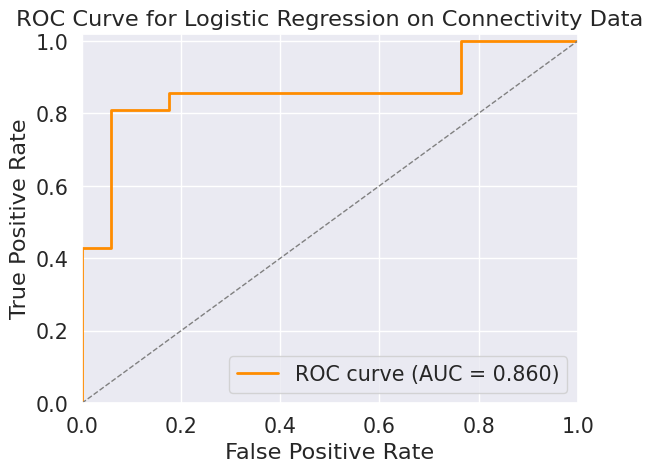

In [429]:
from dython.model_utils import metric_graph
import seaborn as sns

lr1 = lr.predict_proba(X_test)[:,1] # predicted probability of bipolar

sns.set(style="darkgrid", font_scale=1.35)
metric_graph(actual, lr1, metric='roc', fmt='.3f', title='ROC Curve for Logistic Regression on Connectivity Data',
             legend='lower right', eopt=False)
plt.show()

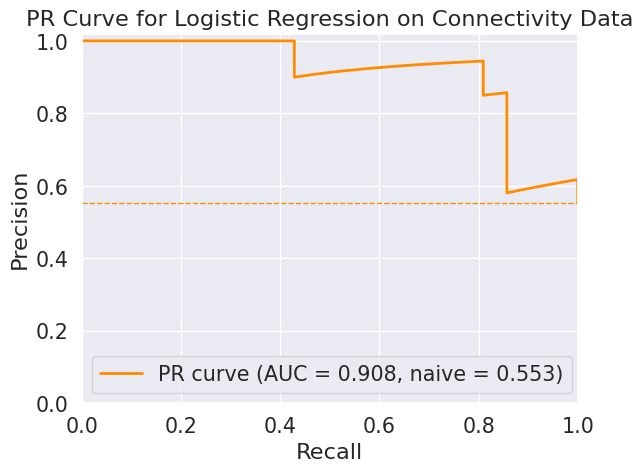

In [433]:
metric_graph(actual, lr1, metric='pr', fmt='.3f', title='PR Curve for Logistic Regression on Connectivity Data',
             legend='lower left', eopt=False) # naive precision/AUC is proportion of bipolar in data.
# precision=PPV, recall=sensitivity
plt.show()

In [431]:
p = metric_graph(actual, lr1, metric='pr', plot=False)['0']['eopt']['y']
r = metric_graph(actual, lr1, metric='pr', plot=False)['0']['eopt']['x']
F1 = 2*p*r/(p+r)
F1 # F1 score (harmonic mean of precision and recall):

0.8717948717948718

# K Nearest Neighbors

In [65]:
# KNN
from sklearn.neighbors import KNeighborsClassifier
# 86.4% test accuracy achieved with n_neighbors = 2, 3, or 7, and full data used.
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform', p=2).fit(X_train, y_train)
knn.score(X_test, y_test)

0.717948717948718

# Decision Tree

In [66]:
# Decision tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=5, min_samples_split=4, criterion='gini',
                            max_depth=2).fit(X_train2, y_train2)
dt.score(X_val, y_val)

0.6153846153846154

# Adaboost (boosted decision trees)

In [67]:
# Adaboost / C4.5
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
adaboost = AdaBoostClassifier(DecisionTreeClassifier(criterion='entropy', min_samples_split=8),
                              n_estimators=50, learning_rate=0.1, random_state=5).fit(X_train2, y_train2)
adaboost.score(X_val, y_val)

0.6153846153846154

# Random Forest

In [288]:
from sklearn.ensemble import RandomForestClassifier
# criterion='entropy', max_depth=3, min_samples_split=24, min_samples_leaf=12,
#                            max_features=None, random_state=0,
#                            class_weight='balanced'
rf = RandomForestClassifier(criterion='entropy', max_depth=3, min_samples_split=24, min_samples_leaf=12,
                            max_features=None, random_state=2,
                            class_weight='balanced').fit(X_train2, y_train2)
rf.score(X_val, y_val)

0.717948717948718

# Naive Bayes

In [70]:
# NB
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB().fit(X_train2, y_train2)
gnb.score(X_val, y_val)

0.5384615384615384

In [71]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(class_prior=[0.5,0.5]).fit(X_train2, y_train2)
mnb.score(X_val, y_val)

0.5897435897435898

In [72]:
from sklearn.naive_bayes import ComplementNB
cnb = ComplementNB().fit(X_train2, y_train2)
cnb.score(X_val, y_val)

0.5897435897435898

# SVM

In [140]:
# SVM with RBF kernel
from sklearn.svm import SVC
svm = SVC(kernel="rbf", C=1).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.5641025641025641

In [97]:
# SVM with linear kernel
svm = SVC(kernel="linear", C=0.3).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.7435897435897436

In [139]:
# SVM with polynomial kernel
svm = SVC(kernel="poly", C=1, degree=3, gamma=0.1).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.7692307692307693

In [76]:
# SVM with sigmoid kernel
svm = SVC(kernel="sigmoid", C=6).fit(X_train2, y_train2)
svm.score(X_val, y_val)

0.5641025641025641

# Neural Networks

In [141]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable

In [143]:
y_train = np.array(y_train)
y_test = np.array(y_test)
y_val = np.array(y_val)
y_train2 = np.array(y_train2)

x = torch.from_numpy(X_train)
y = torch.from_numpy(y_train)
x = x.type(torch.FloatTensor)
y = y.type(torch.LongTensor)
xtest = torch.from_numpy(X_test)
ytest = torch.from_numpy(y_test)
xtest = xtest.type(torch.FloatTensor)
ytest = ytest.type(torch.LongTensor)
xval = torch.from_numpy(X_val)
yval = torch.from_numpy(y_val)
xval = xval.type(torch.FloatTensor)
yval = yval.type(torch.LongTensor)
x2 = torch.from_numpy(X_train2)
y2 = torch.from_numpy(y_train2)
x2 = x2.type(torch.FloatTensor)
y2 = y2.type(torch.LongTensor)

## Neural network with multiple hidden layers

In [243]:
class Net2(torch.nn.Module):     
    def __init__(self, n_feature, n_hidden1, n_hidden2, n_output, k):
        super(Net2, self).__init__()
        #self.pool = nn.MaxPool1d(kernel_size=k)
        self.hidden1 = torch.nn.Linear(n_feature, n_hidden1) 
        self.hidden2 = torch.nn.Linear(n_hidden1, n_hidden2)
        self.out = torch.nn.Linear(n_hidden2, n_output)
        
    def forward(self, x):
        #x = self.pool(x)
        x = F.celu(self.hidden1(x))
        x = F.celu(self.hidden2(x))
        x = self.out(x)                 
        return x

In [ ]:
# Run next 4 cells together each time.

torch.manual_seed(5) #random seed
kernel_size = 1 # set to 1 if not doing pooling.

net = Net2(n_feature=np.floor(X_train.shape[1]/kernel_size).astype(int), 
           n_hidden1=250, n_hidden2=250, n_output=2, k=kernel_size) 
print(net)

In [ ]:
optimizer = torch.optim.SGD(net.parameters(), lr=0.003, momentum=1)
loss_func = torch.nn.CrossEntropyLoss()
epochs = 150
train_error = np.zeros(epochs)
validation_error = np.zeros(epochs)
train_misclass = np.zeros(epochs)
validation_misclass = np.zeros(epochs)

for t in range(epochs):
    out = net(x2)
    outnp = out.detach().numpy()
    loss = loss_func(out, y2)
    out_test = net(xval)
    outnp_test = out_test.detach().numpy()
    loss_test = loss_func(out_test, yval)
    train_error[t] = loss.detach().numpy()
    train_misclass[t] = (np.argmax(outnp, axis=1) != y2.numpy()).mean() * 100
    validation_error[t] = loss_test.detach().numpy()
    validation_misclass[t] = (np.argmax(outnp_test, axis=1) != yval.numpy()).mean() * 100
    optimizer.zero_grad()
    loss.backward()   
    optimizer.step()


In [ ]:
epoch = range(epochs)
plt.plot(epoch, train_error, c='blue')
plt.plot(epoch, validation_error, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Cross-entropy error')
plt.title('Cross-Entropy Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest cross-entropy validation error and number of epochs to achieve:
validation_error.min(), validation_error.argmin()

In [ ]:
plt.plot(epoch, train_misclass, c='blue')
plt.plot(epoch, validation_misclass, c='orange')
plt.xlabel('Epoch')
plt.ylabel('Misclassification error (%)')
plt.title('Misclassification Error vs. Epoch Number')
plt.legend(['Training error', 'Test error'])
#Lowest misclassification percentage and number of epochs to achieve:
validation_misclass.min(), validation_misclass.argmin()